<a href="https://colab.research.google.com/github/yeyni2/signature-verification-final-12th-grade-bagrot-project-/blob/main/testing_signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import tensorflow as tf
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline  
import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Dropout, Flatten, Activation, RandomFlip, RandomRotation, Resizing, Rescaling, experimental
from keras.layers import concatenate, Lambda, Embedding, Input
import random
import cv2
import pathlib
#import tensorflow_addons as tfa
#import tensorflow_datasets as tfds

In [ ]:
true_signature = {}
true_signature["Itzik Yeyni"] = []
true_signature["Or Yeyni"] = []
true_signature["Shalev Yeyni"] = []
true_signature["Tamar Founis"] = []
true_signature["Eyal Moskowitz"] = []
true_signature["Roni Waltman"] = []
true_signature["Adina Waltman"] = []
true_signature["Liran Yeyni"] = []

In [ ]:
def make_data(name, lst):
  name2 = name.split(' ')
  a = '/content/drive/MyDrive/'+name2[0]+name2[1]+'/*.jpeg'
  print(a)
  for img in glob.glob(a):
    img2 = tf.keras.preprocessing.image.load_img(img, target_size = (160,160))
    img2 = np.around(np.array(img2) / 255.0, decimals=12)
    lst[name].append(img2)

In [ ]:
for i in true_signature:
  make_data(i, true_signature)

/content/drive/MyDrive/ItzikYeyni/*.jpeg
/content/drive/MyDrive/OrYeyni/*.jpeg
/content/drive/MyDrive/ShalevYeyni/*.jpeg
/content/drive/MyDrive/TamarFounis/*.jpeg
/content/drive/MyDrive/EyalMoskowitz/*.jpeg
/content/drive/MyDrive/RoniWaltman/*.jpeg
/content/drive/MyDrive/AdinaWaltman/*.jpeg
/content/drive/MyDrive/LiranYeyni/*.jpeg


In [ ]:
fake_signature = []
for img in glob.glob('/content/drive/MyDrive/FakeSignature2/*.jpeg'):
  img2 = tf.keras.preprocessing.image.load_img(img, target_size = (160,160))
  img2 = np.around(np.array(img2) / 255.0, decimals=12)
  #img2 = tf.expand_dims(img2, 0)
  fake_signature.append(img2)

In [ ]:
model_triplet2 = tf.keras.models.load_model('/content/drive/MyDrive/model_triplet2',  compile=False) # מציג תוצאות לא טובות ולא עקביות, 95% דיוק על חתימות זהות ו56% על זיופים כלומר כל המספרים קטנים מ0.5 לא משנה מה.
my_model34 = tf.keras.models.load_model('/content/drive/MyDrive/model34',  compile=False) # המודל מציג ביצועים טובים בזיהוי זיופים 95% דיוק ובזיהוי מקוריות 83% (0.5)
model_triplet = tf.keras.models.load_model('/content/drive/MyDrive/model_triplel',  compile=False)# המודל מציג תוצאות תוצאות מהטיחות בזיהוי כל עוד הצבע זהה, דיוק של 36% בחתימות זהות ו84% בזיופים (0.56) המודל טוב בלזהות צבעים לא זיופים ומחזיר תוצאות גדולות. על נתוני בחינה מציג 48% על זהיים 70% על זיופים ו67% בכלול.
FRmodel = tf.keras.models.load_model('/content/drive/MyDrive/FRmodel',  compile=False)# המודל אינו מגיע לתוצאות הרצויות כלל!
imagenet_model = tf.keras.models.load_model('/content/drive/MyDrive/Xmodel',  compile=False)

In [ ]:
model = model_triplet2

In [ ]:
x = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][0], 0))
y = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][1], 0))
z = model.predict(np.expand_dims(true_signature['Or Yeyni'][0], 0))
print(np.linalg.norm(x - y), np.linalg.norm(x - z))
print(np.sum(np.square(x - y), axis=-1), np.sum(np.square(x - z), axis=-1))

In [ ]:
x = model.predict(np.expand_dims(true_signature['Liran Yeyni'][5], 0))
y = model.predict(np.expand_dims(true_signature['Liran Yeyni'][3], 0))
z = model.predict(np.expand_dims(true_signature['Roni Waltman'][2], 0))
print(np.linalg.norm(x - y), np.linalg.norm(x - z))
print(np.sum(np.square(x - y), axis=-1), np.sum(np.square(x - z), axis=-1))


0.58321965 0.44206858
[0.34014517] [0.19542463]


In [ ]:
x = model.predict(np.expand_dims(true_signature['Or Yeyni'][2], 0))
y = model.predict(np.expand_dims(true_signature['Or Yeyni'][5], 0))
z = model.predict(np.expand_dims(true_signature['Tamar Founis'][2], 0))
print(np.linalg.norm(x - y), np.linalg.norm(x - z))
print(np.sum(np.square(x - y), axis=-1), np.sum(np.square(x - z), axis=-1))

0.4379335 0.016691992
[0.19178577] [0.00027862]


In [ ]:
pos_dist = tf.reduce_sum(tf.square(tf.subtract(x,y)),axis=-1)
neg_dist = tf.reduce_sum(tf.square(tf.subtract(x,z)),axis=-1)
print(pos_dist, neg_dist)
basic_loss = tf.add(tf.subtract(pos_dist,neg_dist),0.4)
loss = tf.reduce_sum(tf.maximum(basic_loss,0))
print(loss)

tf.Tensor([1.607777], shape=(1,), dtype=float32) tf.Tensor([1.5329434], shape=(1,), dtype=float32)
tf.Tensor(0.47483364, shape=(), dtype=float32)


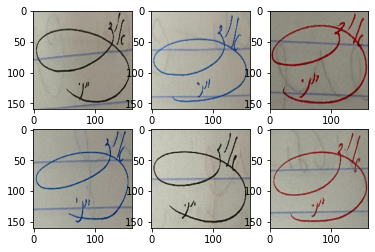

In [ ]:
count = 0
for i in range(6):
  ax = plt.subplot(2, 3, 1+count)
  plt.imshow(true_signature['Itzik Yeyni'][i])
  count += 1

In [ ]:
# the color black
x = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][0], 0))
y = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][4], 0))
print(np.linalg.norm(x - y))
print(np.sum(np.square(x - y), axis=-1))

the color black
0.06365725
[0.00405224]


In [ ]:
#the color blue
x = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][1], 0))
y = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][3], 0))
print(np.linalg.norm(x - y))
print(np.sum(np.square(x - y), axis=-1))

the color blue
0.941481
[0.8863864]


In [ ]:
#the color red
x = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][2], 0))
y = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][5], 0))
print(np.linalg.norm(x - y))
print(np.sum(np.square(x - y), axis=-1))

the color red
0.4379335
[0.19178577]


In [ ]:
print("lets see what colors are hard for the computer")

lets see what colors are hard for the computer


In [ ]:
#the color red and black
x_red = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][2], 0))
y_red = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][5], 0))
x_black = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][0], 0))
y_black = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][4], 0))
lst_red = [x_red, y_red]
lst_black = [x_black, y_black]
for i in lst_red:
  for j in lst_black:
    print(np.linalg.norm(i - j))
    print(np.sum(np.square(i - j), axis=-1))
    print()

the color red and black
0.055755895
[0.00310872]

0.019208454
[0.00036896]

0.38404492
[0.1474905]

0.44769326
[0.20042926]



In [ ]:
#the color red and blue
x_red = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][2], 0))
y_red = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][5], 0))
x_blue = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][1], 0))
y_blue = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][3], 0))
lst_red = [x_red, y_red]
lst_blue = [x_blue, y_blue]
for i in lst_red:
  for j in lst_blue:
    print(np.linalg.norm(i - j))
    print(np.sum(np.square(i - j), axis=-1))
    print()


the color red and blue
0.0811226
[0.00658088]

1.0208942
[1.0422251]

0.35849753
[0.12852047]

0.58321965
[0.34014517]



In [ ]:
#the color black and blue
x_black = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][0], 0))
y_black = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][4], 0))
x_blue = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][1], 0))
y_blue = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][3], 0))
lst_red = [x_black, y_black]
lst_blue = [x_blue, y_blue]
for i in lst_red:
  for j in lst_blue:
    print(np.linalg.norm(i - j))
    print(np.sum(np.square(i - j), axis=-1))
    print()


the color black and blue
0.025809666
[0.00066614]

0.96710634
[0.9352947]

0.08925354
[0.00796619]

1.0307281
[1.0624002]



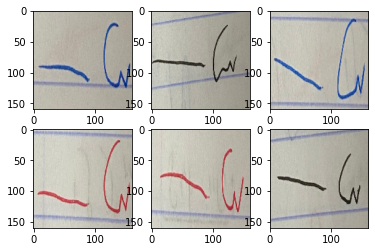

In [ ]:
count = 0
for i in range(6):
  ax = plt.subplot(2, 3, 1+count)
  plt.imshow(true_signature['Or Yeyni'][i])
  count += 1

In [ ]:
#the color black
dims(true_signature['Or Yeyni'][1], 0))
y = model.predict(np.expand_dims(true_signature['Or Yeyni'][5], 0))
print(np.linalg.norm(x - y))
print(np.sum(np.square(x - y), axis=-1))

the color black
0.042519353
[0.0018079]


In [ ]:
#the color blue
x = model.predict(np.expand_dims(true_signature['Or Yeyni'][0], 0))
y = model.predict(np.expand_dims(true_signature['Or Yeyni'][2], 0))
print(np.linalg.norm(x - y))
print(np.sum(np.square(x - y), axis=-1))

the color blue
0.0026993281
[7.2863722e-06]


In [ ]:
#the color red
x = model.predict(np.expand_dims(true_signature['Or Yeyni'][3], 0))
y = model.predict(np.expand_dims(true_signature['Or Yeyni'][4], 0))
print(np.linalg.norm(x - y))
print(np.sum(np.square(x - y), axis=-1))

the color red
0.22087897
[0.04878752]


In [ ]:
#the color red and black
x_red = model.predict(np.expand_dims(true_signature['Or Yeyni'][3], 0))
y_red = model.predict(np.expand_dims(true_signature['Or Yeyni'][4], 0))
x_black = model.predict(np.expand_dims(true_signature['Or Yeyni'][1], 0))
y_black = model.predict(np.expand_dims(true_signature['Or Yeyni'][5], 0))
lst_red = [x_red, y_red]
lst_black = [x_black, y_black]
for i in lst_red:
  for j in lst_black:
    print(np.linalg.norm(i - j))
    print(np.sum(np.square(i - j), axis=-1))
    print()


the color red and black
0.9734462
[0.9475975]

1.0152674
[1.0307679]

0.7526025
[0.5664106]

0.7944468
[0.6311458]



In [ ]:
#the color red and blue
x_red = model.predict(np.expand_dims(true_signature['Or Yeyni'][3], 0))
y_red = model.predict(np.expand_dims(true_signature['Or Yeyni'][4], 0))
x_blue = model.predict(np.expand_dims(true_signature['Or Yeyni'][0], 0))
y_blue = model.predict(np.expand_dims(true_signature['Or Yeyni'][2], 0))
lst_red = [x_red, y_red]
lst_blue = [x_blue, y_blue]
for i in lst_red:
  for j in lst_blue:
    print(np.linalg.norm(i - j))
    print(np.sum(np.square(i - j), axis=-1))
    print()


the color red and blue
1.0255471
[1.0517468]

1.0275722
[1.0559046]

0.80472934
[0.64758927]

0.806759
[0.6508601]



In [ ]:
#the color black and blue
x_black = model.predict(np.expand_dims(true_signature['Or Yeyni'][1], 0))
y_black = model.predict(np.expand_dims(true_signature['Or Yeyni'][5], 0))
x_blue = model.predict(np.expand_dims(true_signature['Or Yeyni'][0], 0))
y_blue = model.predict(np.expand_dims(true_signature['Or Yeyni'][2], 0))
lst_red = [x_black, y_black]
lst_blue = [x_blue, y_blue]
for i in lst_red:
  for j in lst_blue:
    print(np.linalg.norm(i - j))
    print(np.sum(np.square(i - j), axis=-1))
    print()


the color black and blue
0.05267773
[0.00277494]

0.054932095
[0.00301753]

0.010303999
[0.00010617]

0.012420699
[0.00015427]



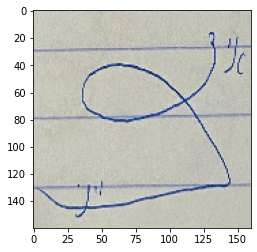

In [ ]:
plt.imshow(fake_signature[29])

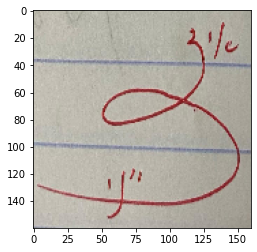

In [ ]:
plt.imshow(fake_signature[0])

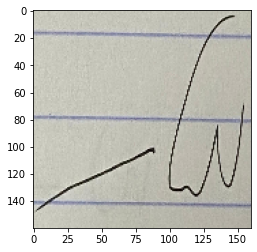

In [ ]:
plt.imshow(fake_signature[76])

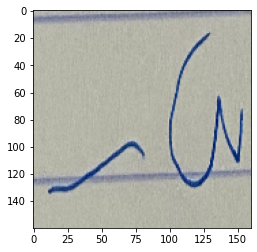

In [ ]:
plt.imshow(fake_signature[1])

In [ ]:
print("lets see if the computer can identify a fake, the first will be easy and the second hard")
itz_fake = [fake_signature[29], fake_signature[0]]
or_fake = [fake_signature[76], fake_signature[1]]

lets see if the computer can identify a fake, the first will be easy and the second hard


In [ ]:
flag = True
for i in or_fake:
  x = model.predict(np.expand_dims(i, 0))
  for j in range(6):
    if flag:
      print("easy")
    else:
      print("hard")
    y = model.predict(np.expand_dims(true_signature['Or Yeyni'][j], 0))
    print(np.linalg.norm(x - y))
    print(np.sum(np.square(x - y), axis=-1))
    print()
  flag = False


easy
1.3022069
[1.695743]

easy
1.2502316
[1.5630791]

easy
1.3042836
[1.7011559]

easy
0.28873867
[0.08337002]

easy
0.5034095
[0.2534212]

easy
1.2920038
[1.6692736]

hard
1.3448129
[1.8085217]

hard
1.2929934
[1.6718321]

hard
1.346765
[1.813776]

hard
0.32292825
[0.10428267]

hard
0.541889
[0.29364368]

hard
1.3345255
[1.7809584]



In [ ]:
flag = True
for i in itz_fake:
  x = model.predict(np.expand_dims(i, 0))
  for j in range(6):
    if flag:
      print("easy")
    else:
      print("hard")
    y = model.predict(np.expand_dims(true_signature['Itzik Yeyni'][j], 0))
    print(np.linalg.norm(x - y))
    print(np.sum(np.square(x - y), axis=-1))
    print()
  flag = False


easy
1.2280385
[1.5080788]

easy
1.202894
[1.4469538]

easy
1.2810133
[1.6409949]

easy
0.28725544
[0.08251568]

easy
1.291512
[1.6680033]

easy
0.84617555
[0.71601295]

hard
1.3075742
[1.7097502]

hard
1.281876
[1.6432059]

hard
1.3614709
[1.8536031]

hard
0.34180084
[0.11682782]

hard
1.3711183
[1.8799653]

hard
0.92417115
[0.8540923]



In [ ]:
count = 0
count2 = 0
for i in true_signature:
  for j in range(5):
    x = model.predict(np.expand_dims(true_signature[i][j], 0)) 
    for p in range(6):
      if p -j >0:
        count2+=1
        y = model.predict(np.expand_dims(true_signature[i][p], 0)) 
        if np.linalg.norm(x - y) < 0.45:
          count+=1
print(count/count2) 

0.5666666666666667


In [ ]:
count3 = 0
for t in true_signature:
  for i in range(6):
    x = model.predict(np.expand_dims(true_signature[t][i], 0))
    for j in range(len(fake_signature)):
      y = model.predict(np.expand_dims(fake_signature[j], 0))
      if np.linalg.norm(x - y) > 0.45:
        count3+=1
print(count3/(6*len(fake_signature)*len(true_signature)))


0.7922794117647058


In [ ]:
print((count+count3)/(count2 +6*len(fake_signature)*len(true_signature)))

0.7890096618357488


In [ ]:
val_signature = {}
val_signature["Jonathan Assa2"] = []
val_signature["Oren Faust"] = []
val_signature["Rachel Founis2"] = []
for i in val_signature:
  make_data(i, val_signature)

/content/drive/MyDrive/JonathanAssa2/*.jpeg
/content/drive/MyDrive/OrenFaust/*.jpeg
/content/drive/MyDrive/RachelFounis2/*.jpeg


In [ ]:
fake_val_signature = []
for img in glob.glob('/content/drive/MyDrive/FakeValidation2/*.jpeg'):
  img2 = tf.keras.preprocessing.image.load_img(img, target_size = (160,160))
  img2 = np.around(np.array(img2) / 255.0, decimals=12)
  fake_val_signature.append(img2)

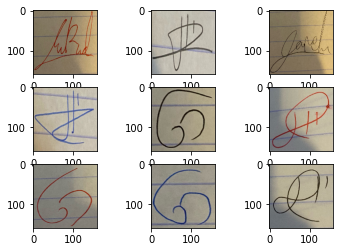

In [ ]:
count = 0
for i in range(9):
  ax = plt.subplot(3, 3, 1+count)
  plt.imshow(fake_val_signature[i])
  count += 1

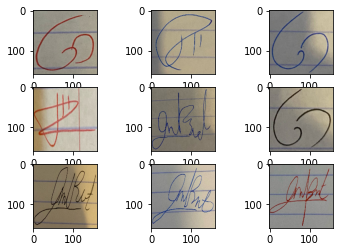

In [ ]:
count = 0
for i in range(9,18):
  ax = plt.subplot(3, 3, 1+count)
  plt.imshow(fake_val_signature[i])
  count += 1

In [ ]:
count = 0
count2 = 0
for i in val_signature:
  for j in range(5):
    x = model.predict(np.expand_dims(val_signature[i][j], 0)) 
    for p in range(6):
      if p -j >0:
        count2+=1
        y = model.predict(np.expand_dims(val_signature[i][p], 0)) 
        if np.linalg.norm(x - y) < 0.45:
          count+=1
print(count/count2) 

0.3333333333333333


In [ ]:
count3 = 0
for t in val_signature:
  for i in range(6):
    x = model.predict(np.expand_dims(val_signature[t][i], 0))
    for j in range(len(fake_val_signature)):
      y = model.predict(np.expand_dims(fake_val_signature[j], 0))
      if np.linalg.norm(x - y) > 0.45:
        count3+=1
print(count3/(6*len(fake_val_signature)*len(val_signature)))


0.7530864197530864


In [ ]:
print((count+count3)/(count2 +6*len(fake_val_signature)*len(val_signature)))

0.7018970189701897
